# Linear Regression ( Multiple Feature )
> 목적
1. 텐서플로우2.0을 사용한 Linear Regression 구현

In [10]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 데이터 불러오기 및 전처리
> 데이터 출처 : https://www.kaggle.com/mohansacharya/graduate-admissions

pandas를 사용한 데이터 불러오기 및 전처리

In [11]:
# 데이터 불러오기
data = pd.read_csv('data/Admission_Predict.csv')
print(data.shape) # 데이터의 형태
print(data.columns) # 데이터 열 파악

(400, 9)
Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


In [12]:
# 데이터 정제
data_X = pd.DataFrame(data[["GRE Score","TOEFL Score",'University Rating','SOP','LOR ','CGPA']]).dropna()
data_Y = pd.DataFrame(data["Chance of Admit "]).dropna()

# 텐서플로우 상수로 변환
X = tf.constant(data_X.values/100,dtype=tf.float32) # 간단한 정규화를 위해 100으로 나누기.
Y = tf.constant(data_Y.values,dtype=tf.float32)

# 파라미터 설정
W = tf.Variable(np.random.rand(6,1),dtype=tf.float32)
b = tf.Variable(np.random.rand(1),dtype=tf.float32)

# 하이퍼 파라미터 설정
learning_rate = 0.0001 # 학습률
num_epochs = 30 # 전체 데이터를 몇번 훈련 시킬지
batch_size = 10 # 전체 데이터를 10개씩 쪼개서 데이터를 훈련
num_data = X.shape[0] # 데이터 총개수

## 2. 데이터 배치 처리
데이터를 가지고 파라미터를 업데이트하는데 있어서, 매번 계산마다 모든 데이터의 값을 연산하여 비용함수를 구하고 미분을 하면 연산 과정이 길어지게되므로, 훈련시간이 길어지게 된다.
이를 방지하기 위해, 데이터를 배치처리하는데 제일 자주 사용되는 방식이 Mini-Batch 방식이다.  
[텐서플로우 기초]노트북에서 더 자세히 다루고 있다.

In [13]:
# 데이터 배치 처리
dataset = tf.data.Dataset.from_tensor_slices((X,Y))
dataset = dataset.repeat(num_epochs).batch(batch_size)
iterator = dataset.__iter__()

## 3. 함수 정의
선형회귀를 훈련 및 예측하기 위해서는 3가지의 수학적 정의가 필요하다.
1. hypothesis ( 가설함수 )
2. cost_function ( 비용함수 )
3. gradient_descent ( 경사 하강법 )

여기서는 자세한 수학적 정의는 다루지 않겠습니다. 궁금하신 분들은 앤드류 응 교수님의 수업을 듣길 추천합니다.

In [14]:
# 가설 함수
def hypothesis(x):
    return tf.matmul(x,W)+b

# 비용 함수
def cost_function(y_true,y_pred):
    return tf.reduce_mean(tf.square(y_pred-y_true))

# 경사 하강법
def gradient_descent(x,y):
    with tf.GradientTape() as tape:
        predict = hypothesis(x)
        cost = cost_function(y, predict)

        dJ_dW, dJ_db = tape.gradient(cost,[W,b])
        W.assign_sub(learning_rate*dJ_dW)
        b.assign_sub(learning_rate*dJ_db)

## 4. 훈련
데이터들을 가지고 경사하강법을 통해 파라미터를 업데이트한다.

In [15]:
cost_log = []
for epoch in range(num_epochs):

    for batch in range(int(num_data/batch_size)):
        x_batch, y_batch = iterator.get_next()

        gradient_descent(x_batch,y_batch)
        cost_value = cost_function(y_batch, hypothesis(x_batch))

    print("#%s \t W: %s \t b: %s \t Cost: %s" % (epoch, W.numpy(), b.numpy(), cost_value.numpy()))
    cost_log.append(cost_value)


#0 	 W: [[0.53634673]
 [0.6496604 ]
 [0.6557311 ]
 [0.4955078 ]
 [0.9265502 ]
 [0.20634286]] 	 b: [0.8354039] 	 Cost: 6.552554
#1 	 W: [[0.47363266]
 [0.62839735]
 [0.65512043]
 [0.4948353 ]
 [0.925868  ]
 [0.20464176]] 	 b: [0.8156072] 	 Cost: 5.3558245
#2 	 W: [[0.4167644 ]
 [0.60911757]
 [0.65456724]
 [0.49422586]
 [0.9252498 ]
 [0.20309944]] 	 b: [0.7976534] 	 Cost: 4.37498
#3 	 W: [[0.36519703]
 [0.59163606]
 [0.6540664 ]
 [0.4936737 ]
 [0.9246897 ]
 [0.20170115]] 	 b: [0.7813706] 	 Cost: 3.571352
#4 	 W: [[0.31843674]
 [0.57578516]
 [0.6536124 ]
 [0.4931734 ]
 [0.92418206]
 [0.20043342]] 	 b: [0.7666029] 	 Cost: 2.9131765
#5 	 W: [[0.27603516]
 [0.5614131 ]
 [0.65320134]
 [0.49272025]
 [0.92372227]
 [0.19928409]] 	 b: [0.7532094] 	 Cost: 2.3743572
#6 	 W: [[0.23758617]
 [0.5483817 ]
 [0.6528293 ]
 [0.49230972]
 [0.92330563]
 [0.19824214]] 	 b: [0.74106175] 	 Cost: 1.9334577
#7 	 W: [[0.20272142]
 [0.5365662 ]
 [0.6524925 ]
 [0.49193797]
 [0.9229282 ]
 [0.19729751]] 	 b: [0.730043

## 5. 모델평가
비용함수의 그래프를 통해서 모델을 평가하려고 합니다. 테스트데이터를 따로 두고 하는 모델 평가는 인공신경망인 NN부터 할 예정입니다.

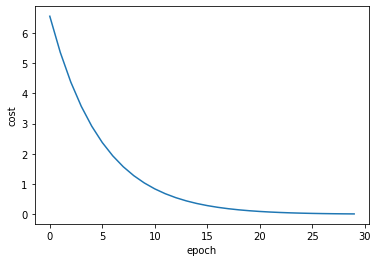

In [16]:
plt.plot(np.arange(30),cost_log,label="cost_value")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()